In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [6]:
#  3. Convert the June temperatures to a list.
june_results = list(june_results)

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)
june_df = june_df.sort_index()

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
december_results = list(december_results)

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['date','December Temps'])
december_df.set_index(december_df['date'], inplace=True)
december_df = december_df.sort_index()

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Two extra queries:

In [13]:
june_temp_progress = session.query(extract('year',Measurement.date), func.avg(Measurement.tobs)).group_by(extract('year', Measurement.date)).filter(extract('month', Measurement.date) == 6)

In [14]:
june_temp_progress = list(june_temp_progress)

In [15]:
june_temp_progress_df = pd.DataFrame(june_temp_progress, columns = ['year','Average Temps'])

In [16]:
december_temp_progress = session.query(extract('year',Measurement.date), func.avg(Measurement.tobs)).group_by(extract('year', Measurement.date)).filter(extract('month', Measurement.date) == 12)

In [17]:
december_temp_progress = list(december_temp_progress)

In [18]:
december_temp_progress_df = pd.DataFrame(december_temp_progress, columns = ['year','Average Temps'])

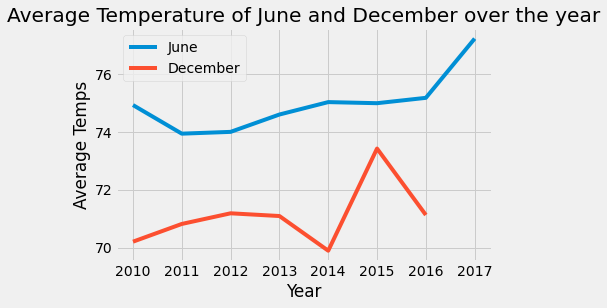

In [19]:
#Plot the June Temerature Progress
plt.plot(june_temp_progress_df['year'], june_temp_progress_df['Average Temps'], label = 'June')

#Plot the December Temerature Progress
plt.plot(december_temp_progress_df['year'], december_temp_progress_df['Average Temps'], label = 'December')

plt.xlabel('Year')
plt.ylabel('Average Temps')

plt.title('Average Temperature of June and December over the year')
plt.legend()

plt.show()


In [20]:
june_prcp_progress = session.query(extract('year',Measurement.date), func.avg(Measurement.prcp)).group_by(extract('year', Measurement.date)).filter(extract('month', Measurement.date) == 6)

In [21]:
june_temp_progress = list(june_temp_progress)
june_prcp_progress_df = pd.DataFrame(june_prcp_progress, columns = ['year','Average Precipitation'])

In [22]:
december_prcp_progress = session.query(extract('year',Measurement.date), func.avg(Measurement.prcp)).group_by(extract('year', Measurement.date)).filter(extract('month', Measurement.date) == 12)

In [23]:
december_prcp_progress= list(december_prcp_progress)
december_prcp_progress_df = pd.DataFrame(december_prcp_progress, columns = ['year','Average Precipitation'])

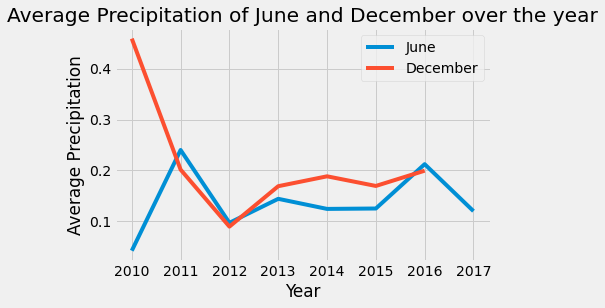

In [25]:
#Plot the June Precipitation Progress
plt.plot(june_prcp_progress_df['year'], june_prcp_progress_df['Average Precipitation'], label = 'June')

#Plot the December Precipitation Progress
plt.plot(december_prcp_progress_df['year'], december_prcp_progress_df['Average Precipitation'], label = 'December')

plt.xlabel('Year')
plt.ylabel('Average Precipitation')

plt.title('Average Precipitation of June and December over the year')
plt.legend()

plt.show()

